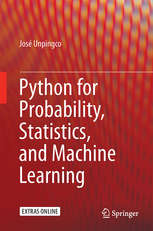

In [15]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [16]:
%pylab inline
from __future__ import division

Populating the interactive namespace from numpy and matplotlib


We saw with maximum likelihood estimation how we could use the
principle of maximum likelihood to derive a formula of the data that
would estimate the underlying parameters (say, $\theta$). Under that
method, the parameter was fixed, but unknown. If we change our
perspective slightly and consider the underlying parameter as a random
variable in its own right, this leads to additional flexibility in
estimation.  This method is the simplest of the family of Bayesian
statistical methods and is most closely related to maximum likelihood
estimation. It is very popular in communications and signal processing
and is the backbone of many important algorithms in those areas.

Given that the parameter $\theta$ is also a random variable, it has a
joint distribution with the other random variables, say,
$f(x,\theta)$.  Bayes' theorem gives the following:

$$
\mathbb{P}(\theta|x) = \frac{\mathbb{P}(x|\theta)\mathbb{P}(\theta)}{\mathbb{P}(x)}
$$

 The $\mathbb{P}(x|\theta)$ term is the usual likelihood term we have
seen before. The term in the denominator is *prior* probability of the data $x$
and it explicitly makes a very powerful claim: even before collecting or
processing any data,  we know what the probability of that data is.  The $\mathbb{P}(\theta)$ is the prior probability of the
parameter. In other words, regardless of the data that is collected, this is
the probability of the parameter itself.

In a particular application, whether or not you feel justified making these
claims is something that you have to reconcile for yourself and the problem at
hand.  There are many persuasive  philosophical arguments one way or the other,
but the main thing to keep in mind when applying any method is whether or not
the assumptions are reasonable for the problem at hand. 

However, for now, let's just assume that we somehow have $\mathbb{P}(\theta)$
and the next step is the maximizing of this expression over the $\theta$.
Whatever results from that maximization is the maximum a-posteriori (MAP)
estimator for $\theta$. Because the maximization takes place with respect to
$\theta$ and not $x$, we can ignore the $\mathbb{P}(x)$ part. To make things
concrete, let us return to our original coin flipping problem.  From our
earlier analysis, we know that the likelihood function for this problem is
the following:

$$
\ell(\theta) := \theta^k (1-\theta)^{ (n-k) }
$$

 where the probability of the coin coming up heads is $\theta$. The
next step is the prior probability, $\mathbb{P}(\theta)$. For this example, we
will choose the $\beta(6,6)$ distribution (shown in the top left panel of
[Figure](#fig:MAP_001)). The $\beta$ family of distributions is a gold mine
because it allows for a wide variety of distributions using few input
parameters. Now that we have all the ingredients, we turn to maximizing the
posterior function, $\mathbb{P}(\theta|x)$. Because the logarithm is convex, we
can use it to make the maximization process easier by converting the product to
a sum without changing the extrema that we are looking for. Thus, we prefer the
to work with the logarithm of $\mathbb{P}(\theta|x)$ as in the following.

$$
\mathcal{L} := \log \mathbb{P}(\theta|x) =  \log \ell(\theta) + \log\mathbb{P}(\theta) - \log\mathbb{P}(x)
$$

 This is tedious to do by hand and therefore an excellent job
for Sympy.

In [17]:
>>> import sympy
>>> from sympy import stats as st
>>> from sympy.abc import p,k,n
# setup objective function using sympy.log
>>> obj=sympy.expand_log(sympy.log(p**k*(1-p)**(n-k)*
                         st.density(st.Beta('p',6,6))(p)))
# use calculus to maximize objective
>>> sol=sympy.solve(sympy.simplify(sympy.diff(obj,p)),p)[0]
>>> sol
(k + 5)/(n + 10)

(k + 5)/(n + 10)

 which means that our MAP estimator of $\theta$ is the following:

$$
\hat{\theta}_{MAP} = \frac{k+5}{n+10}
$$

 where $k$ is the number of heads in the sample. This is obviously a
biased estimator of $\theta$,

$$
\mathbb{E}(\hat{\theta}_{MAP}) = \frac{5+n \theta}{10 +n} \neq \theta
$$

 But is this bias *bad*? Why would anyone want a biased estimator?
Remember that we constructed this entire estimator using the idea of the prior
probability of $\mathbb{P}(\theta)$ which *favors* (biases!) the estimate
according to the prior.  For example, if $\theta=1/2$, the MAP estimator
evaluates to $\hat{\theta}_{MAP}=1/2$. No bias there! This is because the peak
of the prior probability is at $\theta=1/2$. 

To compute the corresponding variance for this estimator, we need this
intermediate result,

$$
\mathbb{E}(\hat{\theta}_{MAP}^2) =\frac{25 +10 n \theta + n \theta((n-1) p+1)}{(10+n)^2}
$$

 which gives the following variance,

$$
\mathbb{V}(\hat{\theta}_{MAP}) = \frac{n (1-\theta) \theta}{(n+10)^2}
$$

Let's pause and compare this to our previous maximum likelihood (ML) estimator
shown below:

$$
\hat{\theta}_{ML} = \frac{1}{n} \sum_{i=1}^n X_i =  \frac{k}{n}
$$

 As we discussed before, the ML-estimator is unbiased with the
following variance.

$$
\mathbb{V}(\hat{\theta}_{ML}) = \frac{\theta(1-\theta)}{n}
$$

 How does this variance compare to that of the MAP? The ratio of the
two is the following:

$$
\frac{\mathbb{V}(\hat{\theta}_{MAP})}{\mathbb{V}(\hat{\theta}_{ML})}=\frac{n^2}{(n+10)^2}
$$

  This ratio shows that the variance for the MAP-estimator is smaller
than that of the the ML-estimator. This is payoff for having a biased
MAP-estimator --- it requires fewer samples to estimate if the underlying
parameter is consistent with the prior probability. If not, then it will take
more samples to pull the estimator away from the bias. In the limit as $n
\rightarrow \infty$, the ratio goes to one.  This means that the benefit of the
reduced variance vanishes with enough samples. 

The above discussion admits a level of arbitrariness via the prior
distribution. We don't have to choose just one prior, however. The
following shows how we can use the previous posterior distribution as the
prior for the next posterior distribution,

$$
\mathbb{P}(\theta|x_{k+1}) = \frac{\mathbb{P}(x_{k+1}|\theta)\mathbb{P}(\theta|x_k)}{\mathbb{P}(x_{k+1})}
$$

 This is a very different strategy because we are using every data
sample $x_k$ as a parameter for the posterior distribution instead of lumping
all the samples together in a summation (this is where we got the $k$
term in the prior case). This case is much harder to analyze because now
every incremental posterior distribution is itself a random function because of
the injection of the $x$ random variable. On the other hand, this is more in
line with more general Bayesian methods because it is clear that the output of
this estimation process is a posterior distribution function, not just a single
parameter estimate. 

[Figure](#fig:MAP_001) illustrates this method. The graph
in the top row, far left shows the prior probability ($\beta(6,6)$) and the dot
on the top shows the most recent MAP-estimate for $\theta$. Thus, before we
obtain any data, the peak of the prior probability  is the estimate. The next
graph to right shows the effect of $x_0=0$ on the incremental prior
probability.  Note that the estimate has barely moved to the left. This is
because the influence of the data has not caused the prior probability to drift
away from the original $\beta(6,6)$-distribution.  The first two rows of the
figure all have $x_k=0$ just to illustrate how far left the original prior
probability can be moved by those data. The dots on the tops of the sub-graphs
show how the MAP estimate changes frame-by-frame as more data is incorporated.
The remaining graphs, proceeding top-down, left-to-right show the incremental
change in the prior probability for $x_k=1$.  Again, this shows how far to the right 
the estimate can be pulled from where it started. For this example, there
are an equal number of $x_k=0$ and $x_k=1$ data, which corresponds 
to $\theta=1/2$.  

<!-- dom:FIGURE: [fig-statistics/MAP_001.png, width=500 frac=0.95] The prior probability is the $\beta(6,6)$ distribution shown in the top left panel. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame <div id="fig:MAP_001"></div> -->
<!-- begin figure -->
<div id="fig:MAP_001"></div>

<p>The prior probability is the $\beta(6,6)$ distribution shown in the top left panel. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame</p>
<img src="fig-statistics/MAP_001.png" width=500>

<!-- end figure -->


**Programming Tip.**

Although the IPython Notebook accompanying this section has the full source
code, the following is a quick paraphrase of how [Figure](#fig:MAP_001) was
constructed. The first step is to recursively create the
posteriors from the data. Note the example data is sorted
to make the progression easy to see as a sequence.

In [18]:
from sympy.abc import p,x
from sympy.stats import density, Beta, Bernoulli
prior = density(Beta('p',6,6))(p)
likelihood=density(Bernoulli('x',p))(x)
data = (0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
posteriors = [prior]
for i in data:
    posteriors.append(posteriors[-1]*likelihood.subs(x,i))

 With the posteriors in hand, the next step 
is to compute the peak values at each frame using the
`fminbound` function from Scipy's  `optimize` module.

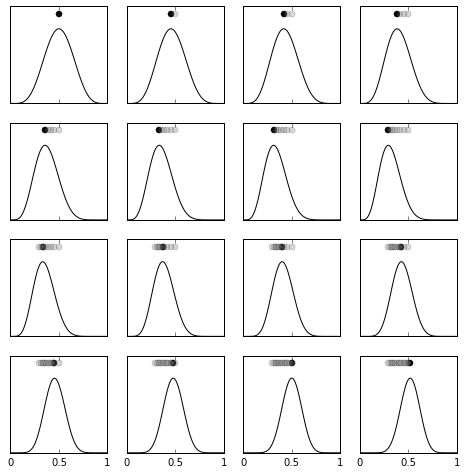

In [19]:
from scipy.optimize import fminbound

fig,ax = subplots(4,4,sharex=True,
                  subplot_kw={'yticks':[''],
                              'yticklabels':[''],
                              'xticks':[0,0.5,1],
                              'xticklabels':[0,0.5,1]})
fig.set_size_inches((8,8))
pvals = linspace(0,1,100)
mxvals = []
for i,j in zip(ax.flat,posteriors):
    i.plot(pvals, sympy.lambdify(p,j)(pvals),color='k')
    mxval = fminbound(sympy.lambdify(p,-j),0,1)
    mxvals.append(mxval)
    h = i.axis()[-1]
    i.axis(ymax=h*1.3)
    i.plot(mxvals[-1],h*1.2,'ok')
    i.plot(mxvals[:-1],[h*1.2]*len(mxvals[:-1]),'o',color='gray',alpha=.3)


The [Figure](#fig:MAP_002) is the same as [Figure](#fig:MAP_001) except that
the initial prior probability is the $\beta(1.3,1.3)$-distribution, which has a
wider lobe that the $\beta(6,6)$-distribution. As shown in the figure, this
prior has the ability to be swayed more violently one way or the other based on
the $x_k$ data that is incorporated. This means that it can more quickly adapt
to data that is not so consistent with the initial prior and thus does not
require a large amount of data in order to *unlearn* the prior probability.
Depending on the application, the ability to unlearn the prior probability or
stick with it is a design problem for the analyst. In this example, because the
data are representative of a $\theta=1/2$ parameter, both priors eventually
settle on an estimated posterior that is about the same. However, if this had
not been the case ($\theta \neq 1/2$), then the second prior 
would have produced a better estimate for the same amount of data [^IPyNote]. 

[^IPyNote]: The IPython Notebook corresponding to this
chapter contains the source code sot hat you can try different
combinations of priors and data values.

<!-- dom:FIGURE: [fig-statistics/MAP_002.png, width=500 frac=0.95] For this example, the prior probability is the $\beta(1.3,1.3)$ distribution, which has a wider main lobe than the $\beta(6,6)$ distribution. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame. <div id="fig:MAP_002"></div> -->
<!-- begin figure -->
<div id="fig:MAP_002"></div>

<p>For this example, the prior probability is the $\beta(1.3,1.3)$ distribution, which has a wider main lobe than the $\beta(6,6)$ distribution. The dots near the peaks of each of the subgraphs indicate the MAP estimate at that frame.</p>
<img src="fig-statistics/MAP_002.png" width=500>

<!-- end figure -->


Because we have the entire posterior density available, we can compute
something that is closely related to the confidence interval we discussed
earlier, except in this situation, given the Bayesian interpretation, it is
called a *credible interval* or *credible set*.  The idea is that we want to
find a symmetric interval around the peak that accounts for 95% (say) of the
posterior density. This means that we can then say the probability that the
estimated parameter is within the credible interval is 95%. The computation
requires significant numerical processing because even though we have the
posterior density in hand, it is hard to integrate analytically and requires
numerical quadrature (see Scipy's `integrate` module).  [Figure](#fig:MAP_003)
shows extent of the interval and the shaded region under the posterior density
that accounts for 95%.

<!-- dom:FIGURE: [fig-statistics/MAP_003.png, width=500 frac=0.75] The *credible interval* in Bayesian maximum a-posteriori is the interval corresponding to the shaded region in the posterior density.  <div id="fig:MAP_003"></div> -->
<!-- begin figure -->
<div id="fig:MAP_003"></div>

<p>The <em>credible interval</em> in Bayesian maximum a-posteriori is the interval corresponding to the shaded region in the posterior density.</p>
<img src="fig-statistics/MAP_003.png" width=500>

<!-- end figure -->

In [20]:
from sympy.abc import p,x
prior = density(Beta('p',1.3,1.3))(p)
# prior = density(Beta('p',6,6))(p)
likelihood=density(Bernoulli('x',p))(x)
data = (0,0,0,0,0,0,0,1,1,1,1,1,1,1,1)
posteriors = [prior]
for i in data:
    posteriors.append(posteriors[-1]*likelihood.subs(x,i))

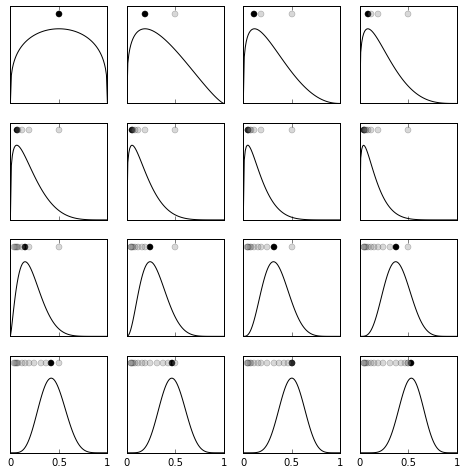

In [21]:
fig,ax = subplots(4,4,sharex=True,
                  subplot_kw={'yticks':[''],
                              'yticklabels':[''],
                              'xticks':[0,0.5,1],
                              'xticklabels':[0,0.5,1]})
fig.set_size_inches((8,8))
pvals = linspace(0,1,100)
mxvals = []
for i,j in zip(ax.flat,posteriors):
    i.plot(pvals, sympy.lambdify(p,j)(pvals),color='k')
    mxval = fminbound( sympy.lambdify(p,-j),0,1)
    mxvals.append(mxval)
    h = i.axis()[-1]
    i.axis(ymax=h*1.3)
    i.plot(mxvals[-1],h*1.2,'ok')
    i.plot(mxvals[:-1],[h*1.2]*len(mxvals[:-1]),'o',color='gray',alpha=.3)